In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [80]:
data = pd.read_csv('./Data/dataset_bbl.csv')

In [81]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=1506669923)

In [83]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\Maulana Ihsan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [84]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)

# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute MAE
#mae_baseline = mean_absolute_error(y_test, baseline_predictions)
#print("Baseline MAE is {:.2f}".format(mae_baseline))

rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE: %f" % (rmse))

Baseline RMSE: 54.617013


In [85]:
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [86]:
params['eval_metric'] = "rmse"
num_boost_round = 999

In [87]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

[0]	Test-rmse:141.91
Will train until Test-rmse hasn't improved in 100 rounds.
[1]	Test-rmse:102.184
[2]	Test-rmse:74.3657
[3]	Test-rmse:55.4932
[4]	Test-rmse:42.1648
[5]	Test-rmse:33.3852
[6]	Test-rmse:27.781
[7]	Test-rmse:24.2973
[8]	Test-rmse:22.0665
[9]	Test-rmse:20.3968
[10]	Test-rmse:19.6572
[11]	Test-rmse:19.1925
[12]	Test-rmse:18.8205
[13]	Test-rmse:18.6718
[14]	Test-rmse:18.4939
[15]	Test-rmse:18.4437
[16]	Test-rmse:18.3452
[17]	Test-rmse:18.274
[18]	Test-rmse:18.2627
[19]	Test-rmse:18.2443
[20]	Test-rmse:18.2337
[21]	Test-rmse:18.2439
[22]	Test-rmse:18.2205
[23]	Test-rmse:18.2172
[24]	Test-rmse:18.2158
[25]	Test-rmse:18.2131
[26]	Test-rmse:18.2153
[27]	Test-rmse:18.2128
[28]	Test-rmse:18.2158
[29]	Test-rmse:18.2163
[30]	Test-rmse:18.2134
[31]	Test-rmse:18.2109
[32]	Test-rmse:18.2106
[33]	Test-rmse:18.2109
[34]	Test-rmse:18.2104
[35]	Test-rmse:18.212
[36]	Test-rmse:18.2136
[37]	Test-rmse:18.2133
[38]	Test-rmse:18.2132
[39]	Test-rmse:18.2132
[40]	Test-rmse:18.215
[41]	Test-rmse

In [91]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=100)

In [90]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,142.952829,0.955604,143.055023,5.250282
1,102.530153,0.665952,103.188994,4.808437
2,73.962420,0.490288,75.843262,4.770156
3,53.622214,0.309276,56.914687,4.837845
4,39.087585,0.256908,44.091325,5.093548
5,28.646787,0.168682,35.853805,4.897628
6,21.082966,0.103789,30.361802,5.038093
7,15.628344,0.064459,27.121891,5.118529
8,11.629914,0.020783,25.165006,4.902534
9,8.716195,0.025248,24.101331,4.861667


In [92]:
cv_results['test-rmse-mean'].min()

22.1179704

In [16]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(0,10)
    for min_child_weight in range(0,10)
]

In [17]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best rmse
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=0, min_child_weight=0


C:\Users\Maulana Ihsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=1
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=2
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=3
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=4
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=5
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=6
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=7
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=8
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=0, min_child_weight=9
	RMSE 60.32571180000001 for 17 rounds
CV with max_depth=1, min_child_weight=0
	RMSE 24.0352782 for 312 rounds
CV with max_depth=1, min_child_weight=1
	RMSE 24.0352782 for 312 rounds
CV with max_depth=1, min_child_weight=2
	RMSE 24.0352782 for 312 rounds
CV with max_depth=1, min_child_weight=3
	RMS

In [18]:
params['max_depth'] = 6
params['min_child_weight'] = 9

In [19]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [20]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0


C:\Users\Maulana Ihsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 19.1314132 for 65 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 20.395874999999997 for 56 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 20.718031200000002 for 83 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 22.1952916 for 72 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 19.658923800000004 for 103 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 20.403494000000002 for 78 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 20.531831599999997 for 61 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 20.6570196 for 114 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 20.150905799999997 for 146 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 20.2540188 for 48 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 20.8553398 for 69 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 20.6649292 for 95 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 19.9991652 for 64 rounds
CV with subsample=0.7, colsample=0.9
	RMSE 21.364714199999998 for 45 rounds
CV with subsample=0.7, col

In [21]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [22]:
%time

# This can take some time…
min_rmse = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # We update our parameters
    params['eta'] = eta
    
    # Run and time CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
#    %time cv_results = xgb.cv(
#            params,
#            dtrain,
#            num_boost_round=num_boost_round,
#            seed=42,
#            nfold=5,
#            metrics=['mae'],
#            early_stopping_rounds=10
#            )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

Wall time: 0 ns
CV with eta=0.3


C:\Users\Maulana Ihsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	RMSE 19.1314132 for 65 rounds

CV with eta=0.2
	RMSE 20.384389000000002 for 140 rounds

CV with eta=0.1
	RMSE 19.6149036 for 249 rounds

CV with eta=0.05
	RMSE 18.8482028 for 545 rounds

CV with eta=0.01
	RMSE 19.3725652 for 998 rounds

CV with eta=0.005
	RMSE 20.368369 for 998 rounds

Best params: 0.05, RMSE: 18.8482028


In [23]:
params['eta'] = .05

In [24]:
params

{'max_depth': 6,
 'min_child_weight': 9,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

In [25]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:184.851
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:175.997
[2]	Test-rmse:167.58
[3]	Test-rmse:159.538
[4]	Test-rmse:151.935
[5]	Test-rmse:144.674
[6]	Test-rmse:137.93
[7]	Test-rmse:131.41
[8]	Test-rmse:125.3
[9]	Test-rmse:119.469
[10]	Test-rmse:113.917
[11]	Test-rmse:108.606
[12]	Test-rmse:103.666
[13]	Test-rmse:98.942
[14]	Test-rmse:94.4303
[15]	Test-rmse:90.1594
[16]	Test-rmse:86.0991
[17]	Test-rmse:82.3008
[18]	Test-rmse:78.7726
[19]	Test-rmse:75.1942
[20]	Test-rmse:71.7591
[21]	Test-rmse:68.7139
[22]	Test-rmse:65.7117
[23]	Test-rmse:62.9506
[24]	Test-rmse:60.3449
[25]	Test-rmse:57.7553
[26]	Test-rmse:55.4748
[27]	Test-rmse:53.2606
[28]	Test-rmse:51.128
[29]	Test-rmse:49.1773
[30]	Test-rmse:47.3311
[31]	Test-rmse:45.631
[32]	Test-rmse:43.953
[33]	Test-rmse:42.4272
[34]	Test-rmse:41.0028
[35]	Test-rmse:39.7391
[36]	Test-rmse:38.4571
[37]	Test-rmse:37.3415
[38]	Test-rmse:36.1658
[39]	Test-rmse:35.2022
[40]	Test-rmse:34.1779
[41]	Test-rmse:33.2

In [26]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:184.851
[1]	Test-rmse:175.997
[2]	Test-rmse:167.58
[3]	Test-rmse:159.538
[4]	Test-rmse:151.935
[5]	Test-rmse:144.674
[6]	Test-rmse:137.93
[7]	Test-rmse:131.41
[8]	Test-rmse:125.3
[9]	Test-rmse:119.469
[10]	Test-rmse:113.917
[11]	Test-rmse:108.606
[12]	Test-rmse:103.666
[13]	Test-rmse:98.942
[14]	Test-rmse:94.4303
[15]	Test-rmse:90.1594
[16]	Test-rmse:86.0991
[17]	Test-rmse:82.3008
[18]	Test-rmse:78.7726
[19]	Test-rmse:75.1942
[20]	Test-rmse:71.7591
[21]	Test-rmse:68.7139
[22]	Test-rmse:65.7117
[23]	Test-rmse:62.9506
[24]	Test-rmse:60.3449
[25]	Test-rmse:57.7553
[26]	Test-rmse:55.4748
[27]	Test-rmse:53.2606
[28]	Test-rmse:51.128
[29]	Test-rmse:49.1773
[30]	Test-rmse:47.3311
[31]	Test-rmse:45.631
[32]	Test-rmse:43.953
[33]	Test-rmse:42.4272
[34]	Test-rmse:41.0028
[35]	Test-rmse:39.7391
[36]	Test-rmse:38.4571
[37]	Test-rmse:37.3415
[38]	Test-rmse:36.1658
[39]	Test-rmse:35.2022
[40]	Test-rmse:34.1779
[41]	Test-rmse:33.2984
[42]	Test-rmse:32.4361
[43]	Test-rmse:31.6589
[44]	Te

In [27]:
mean_absolute_error(best_model.predict(dtest), y_test)

11.556810418876696

In [28]:
best_model.save_model("xgboost.model")

In [98]:
loaded_model = xgb.Booster()
loaded_model.load_model("xgboost.model")
# And use it for predictions.
predict = loaded_model.predict(dtest)
pred_train = loaded_model.predict(dtrain)

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE: %f" % (rmse))

RMSE: 11.891283


In [104]:
# Calculate the absolute errors
errors = abs(predict - y_test)
R_Squared = r2_score(y_test, predict)
R_Squared_train = r2_score(y_train, pred_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('R Squared Test:', R_Squared)
print('R Squared Train:', R_Squared_train)

Mean Absolute Error: 3.56 degrees.
R Squared Test: 0.9525974482938786
R Squared Train: 0.9819734772432154


In [101]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.34 %.


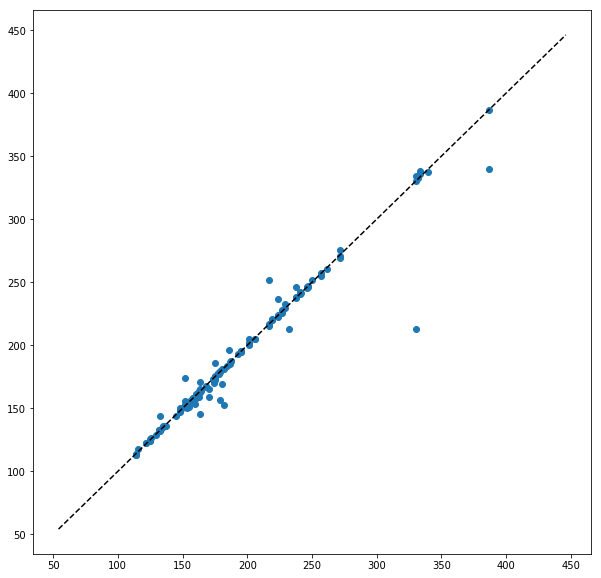

In [97]:
import matplotlib.pyplot as plt


min_val = min(y_train.describe()['min'], y_test.describe()['min'])
max_val = max(y_train.describe()['max'], y_test.describe()['max'])
std_val = max(y_train.describe()['std'], y_test.describe()['std'])
lower_limit = min_val-std_val
upper_limit = max_val+std_val

plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.001)
plt.plot(t, t, 'k--')#, alpha=0.2)
#plt.scatter(test_labels, predictions)
plt.scatter(y_test, predict)

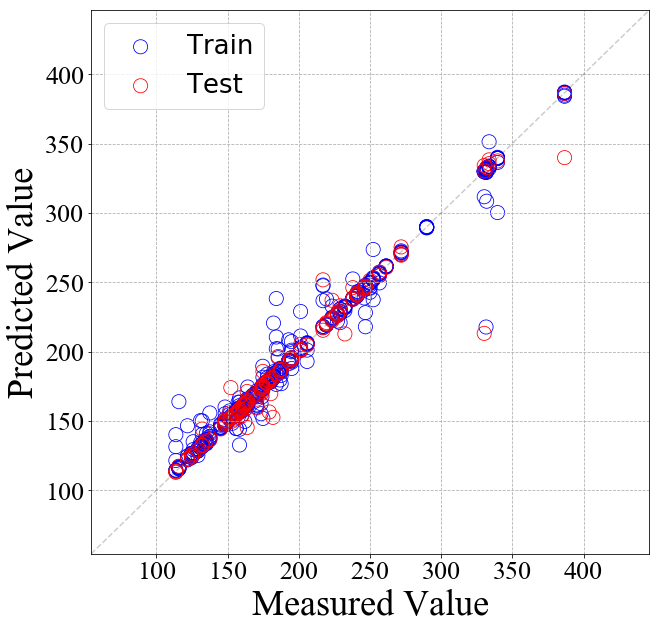

In [103]:
OUTPUT_PATH = 'Output/Result/'
CSFONT_LABEL = {'fontname':'Times New Roman', 'fontsize': 36}
CSFONT_TICKS = {'fontname':'Times New Roman', 'fontsize': 26}
CSFONT_R = {'fontname':'Times New Roman', 'fontsize': 24}

min_val = min(y_train.describe()['min'], y_test.describe()['min'])
max_val = max(y_train.describe()['max'], y_test.describe()['max'])
std_val = max(y_train.describe()['std'], y_test.describe()['std'])
lower_limit = min_val-std_val
upper_limit = max_val+std_val

#plot train test
plt.figure(figsize=(10,10))
t = np.arange(lower_limit, upper_limit, 0.001)
plt.plot(t, t, 'k--', alpha=0.2)
plt.scatter(y_train, pred_train, label='Train', facecolors='none', edgecolors='b', linewidths=0.8, s=200)
plt.scatter(y_test, predict, label='Test', facecolors='none', edgecolors='r', linewidths=0.8, s=200)
plt.xlabel('Measured Value', **CSFONT_LABEL)
plt.ylabel('Predicted Value', **CSFONT_LABEL)
plt.xticks(**CSFONT_TICKS)
plt.yticks(**CSFONT_TICKS)
plt.xlim([lower_limit,upper_limit])
plt.ylim([lower_limit, upper_limit])
# plt.title('Hasil Pemodelan')
plt.legend(fontsize=26)
plt.grid(linestyle='--')
filename = 'fit_regress_XGBoost'
plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

# Using Feature Selection

In [16]:
# Saving feature names for later use
feature_list = list(X.columns)

# Extract the two most important features
important_indices = [feature_list.index('731.79'), feature_list.index('737.25'),
                    feature_list.index('734.52'), feature_list.index('421.24'),
                    feature_list.index('742.72'), feature_list.index('402.9'),
                    feature_list.index('413.37'), feature_list.index('431.74'),
                    feature_list.index('726.33'), feature_list.index('739.98'),
                    feature_list.index('397.66'), feature_list.index('400.28'),
                    feature_list.index('410.75'), feature_list.index('416'),
                    feature_list.index('418.62'), feature_list.index('423.86'),
                    feature_list.index('426.49'), feature_list.index('429.12'),
                    feature_list.index('434.37'), feature_list.index('439.63'),
                    feature_list.index('444.89'), feature_list.index('452.79'),
                    feature_list.index('720.87'), feature_list.index('729.06'),
                    feature_list.index('745.45'), feature_list.index('950.38'),
                    feature_list.index('970.03'), feature_list.index('972.84'),
                    feature_list.index('978.46')]

train_features_nparr = np.array(X_train)
test_features_nparr = np.array(X_test)

train_important = train_features_nparr[:, important_indices]
test_important = test_features_nparr[:, important_indices]

dtrain_importance = xgb.DMatrix(train_important, label=y_train)
dtest_importance = xgb.DMatrix(test_important, label=y_test)

In [18]:
loaded_model = xgb.Booster()
loaded_model.load_model("xgboost.model")
# And use it for predictions.
predict_impo = loaded_model.predict(dtest_importance)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE: %f" % (rmse))

RMSE: 67.793905
